In [3]:
%load_ext autoreload

# Examen

# Mínimos cuadrados

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [4]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

## Conjunto de datos 1

In [5]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

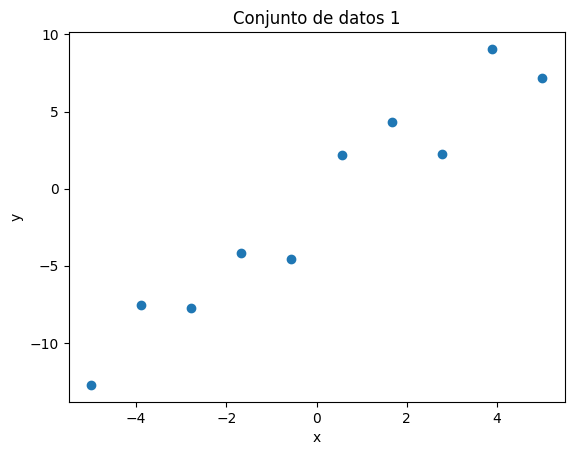

In [6]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [7]:
%autoreload 2
from src import ajustar_min_cuadrados
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
pars # parámetros de la curva ajustada

[07-19 19:15:23][INFO] 2024-07-19 19:15:23.624032
[07-19 19:15:23][INFO] 2024-07-19 19:15:23.627219
[07-19 19:15:23][INFO] 2024-07-19 19:15:23.629455
[07-19 19:15:23][INFO] Se ajustarán 2 parámetros.
[07-19 19:15:23][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


array([ 2.06057364, -1.17356   ])

In [8]:
# ####################################################################
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

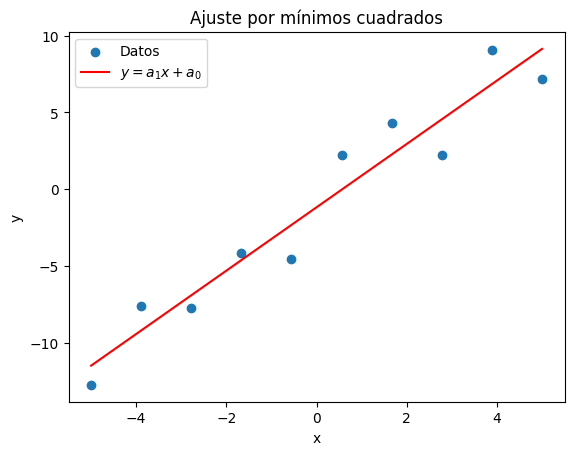

In [9]:
import numpy as np

x = np.linspace(-5, 5, 100)
y = [linea(xi, pars) for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

## Conjunto de datos 2

In [10]:
xs2 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys2 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

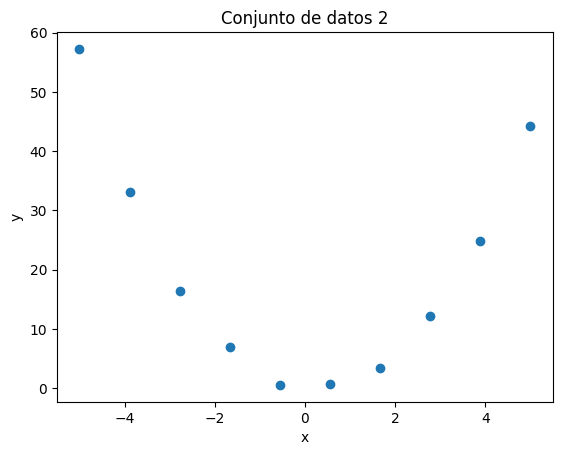

In [11]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Al utilizar el método de mínimos cuadrados con una función lineal se obtienen malos resultados.

[07-19 19:15:37][INFO] Se ajustarán 2 parámetros.
[07-19 19:15:37][INFO] 
[[ 101.8525926     0.         -114.41357678]
 [   0.           10.          199.8089    ]]


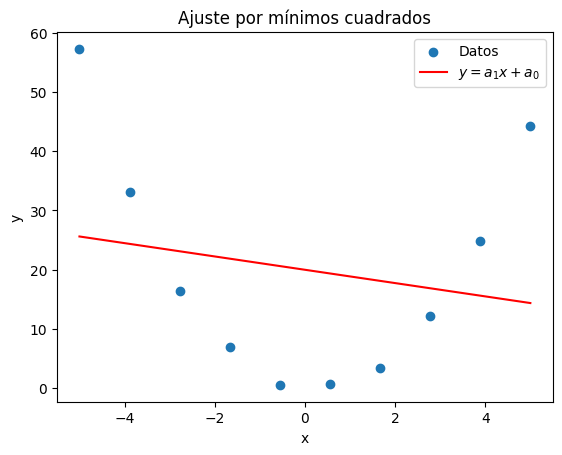

In [12]:
import numpy as np

x = np.linspace(-5, 5, 100)

pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0, der_parcial_1])

y = [linea(xi, pars) for xi in x]

plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

# Indicaciones
Su trabajo es ajustar el código para utilizar una función cuadrática que aproxime los puntos. Tenga en cuenta las siguientes consideraciones:
* Usar el método de mínimos cuadrados para interpolar los puntos.
* Graficar la función cuadrática y los puntos dados.
* Listar los cambios realizados.
* Modificar y utilizar SOLO el código provisto. No se aceptarán la utilización de otras librerías o funciones.

In [16]:
# ####################################################################
from src import eliminacion_gaussiana
def der_parcial_0_exp(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    n = len(xs)
    sum_x = sum(xs)
    sum_x2 = sum(xi**2 for xi in xs)
    sum_x3 = sum(xi**3 for xi in xs)
    sum_x4 = sum(xi**4 for xi in xs)
    sum_y = sum(y)
    sum_xy = sum(xi*yi for xi, yi in zip(xs, ys))
    sum_x2y = sum((xi**2)*yi for xi, yi in zip(xs, ys))
    A = [
    [sum_x4, sum_x3, sum_x2],
    [sum_x3, sum_x2, sum_x],
    [sum_x2, sum_x, n]]
    B = [sum_x2y, sum_xy, sum_y]
    resp = eliminacion_gaussiana(A)


def f(x,a2,a1,a0):
    return a2 * x**2 + a1 * x + a0

import numpy as np

x = np.linspace(-5, 5, 100)

pars = ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_0_exp, der_parcial_1])

print(der_parcial_0_exp)
y = [linea(xi, pars) for xi in x]
#x_fit = [i/10 for i in range(min(x) * 10, max(x) * 10 + 1)]
#y_fit = [f(xi) for xi in x_fit]
plt.scatter(xs2, ys2, label="Datos")
#plt.plot(x_fit, y_fit, color='blue', label='Ajuste cuadrático')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados")
plt.legend()
plt.show()

[07-19 19:50:32][INFO] Se ajustarán 2 parámetros.


AssertionError: La matriz A debe ser de tamaño n-by-(n+1).

Su gráfico debe ser similar a:
![alt text](<assets/2do orden.jpg>)